In [1]:
%run functions.ipynb
%run matrix_DFM_class.ipynb
%run PVD_class.ipynb
%run RPCA_class.ipynb

In [2]:
y,R,C,f,P,D,risk=generate_matrix_test_data(20,20,5000)

In [3]:
#generate an example problem: recover L_0 (and C_0) when given M_0
rho = .1   #proportion of corrupted entries
var = 20    #variance of the normal distribution generating the noise
def add_noise(L_0, rho, var):
    S_0 = np.random.binomial(1,rho, L_0.shape)  #affected entries
    N   = np.random.normal(0, var, L_0.shape)   #noise into affected entries
    C_0 = S_0 * N

    return(C_0 + L_0, C_0)

y, C_0 = add_noise(y, rho, var)

In [10]:
model=PVD(new)

In [11]:
model.fit()

In [12]:
trace_stat(np.hstack([P,R]).T,model.left_loading.T)

0.9635324992088101

In [13]:
trace_stat(np.hstack([C,D]).T,model.right_loading.T)

0.043411342646128774

In [14]:
model.left_loading.T.shape

(19, 20)

In [15]:
model.right_loading.T.shape

(2, 20)

In [4]:
mat_0=ten2mat(y,0)

In [20]:
model=R_pca(mat_0)
L,E=model.fit()
np.linalg.matrix_rank(L)

iteration: 1, error: 0.0006181959319724297


20

In [6]:
L.shape

(20, 100000)

In [19]:
new_mat=L
new_mat.reshape(20,20,5000)
mat_1=ten2mat(new_mat,1)
model=R_pca(mat_1)
L,E=model.fit()
print(np.linalg.matrix_rank(L))
new_mat=L
new=new_mat.reshape(20,20,5000)

iteration: 1, error: 0.000618028807268563
20


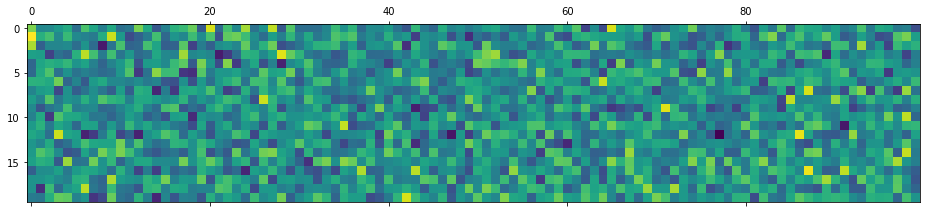

In [8]:
plt.matshow((y-C_0)[0,:,:100])

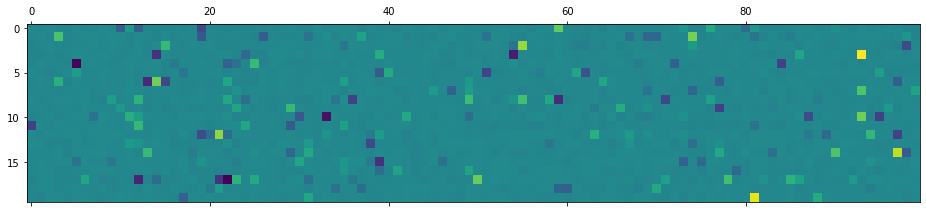

In [9]:
plt.matshow(new[0,:,:100])

In [26]:
percentage_error(y-C_0,new)

0.5910203341005333


In [27]:
percentage_error(y-C_0,y)

6.171693391967358
